## Plot Configuration

In this section, we discuss MobsPy's plotting configuration. 
MobsPy possesses an encapsulation of Pyplot adapted for plotting multiple figures with multiple BCRN species each. The encapsulation consists of a hierarchical plotting structure that allows the user to easily specify the plotting conditions over multiple plots in several figures.  

We will start with the code to configure a plot. 
In that case, the user has two options. Firstly, one can perform a dot operation in the simulation object, followed by \texttt{plot\_config} and then followed by the name of the mathplotlib plot argument name. 
Another is to use the \texttt{add\_plot\_parameters} function with either a dictionary as an argument or with the mathplotlib plot argument names.

Further, to add plot annotations, the command is called annotate. It must receive a list of dictionaries, and each dictionary must contain the keys with the text and coordinates. Other parameters ("textcoords", "xytext", "fontsize") are optional and can be added to the keys of each dictionary. 

Compiling model
Starting Simulator
/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Simulation is Over


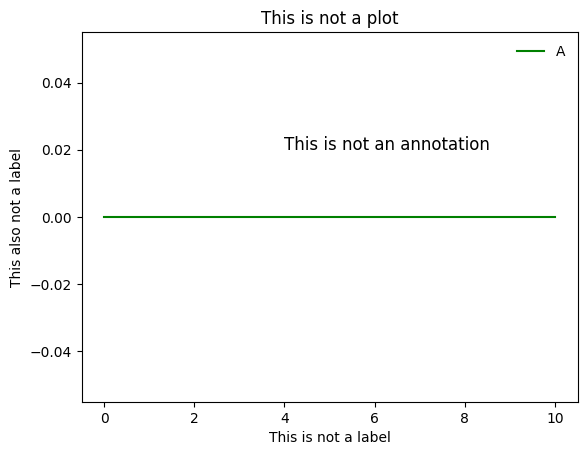

In [1]:
from mobspy import *

A = BaseSpecies()

A >> Zero [1]

S = Simulation(A)
S.duration = 10
S.plot_config.title = "This is not a plot"
S.add_plot_params(xlabel='This is not a label', ylabel='This also not a label')
S.plot_config.annotations = [{"text":"This is not an annotation", "coordinates":(4, 0.02), "fontsize": "large"}]
S.run()

To plot multiple figures, one can use the "figures" key in a dictionary passed as an argument to \texttt{plot\_raw}. The "figures" key receives as value a list of dictionaries, each element of the list containing the configurations of one figure. 
One figure will be plotted for every element of this list. 

MobsPy has some plotting parameters that can be configured for a species. If a species name is used as a key inside a dictionary used as an argument to the \texttt{plot\_raw} method, with a dictionary as a value, it can set the following parameters: 'color, 'linestyle', 'linewidth', and 'label' throughout all figures in which it is plotted.  

In the example below, we use the attribute \texttt{species\_to\_plot} to plot different species in separate figures and configure specific species parameters for both \texttt{A} and \texttt{B}. 

Compiling model
Starting Simulator
Simulation is Over


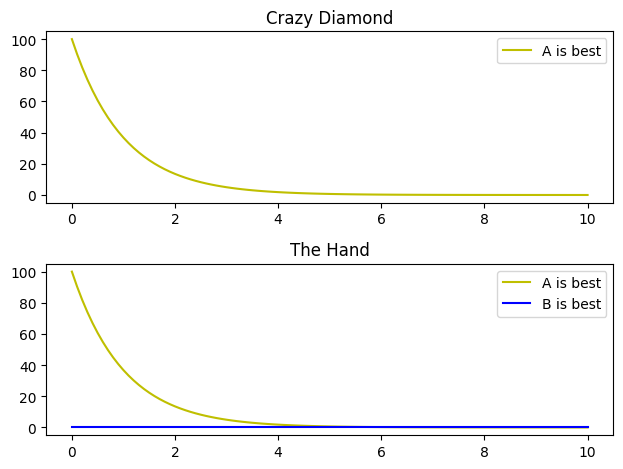

In [2]:
from mobspy import *

A, B = BaseSpecies()

A >> Zero [1]
B >> Zero [1]

A(100)
S = Simulation(A | B)
S.duration = 10
S.plot_data = False
S.run()
A_config = {'color':'y', 'label':'A is best'}
B_config = {'color':'b', 'label':'B is best'}
fig_1 = {'title':'Crazy Diamond', 'species_to_plot':['A']}
fig_2 = {'title':'The Hand', 'species_to_plot':['A','B']}
config_dict = {'figures': [fig_1, fig_2], 'tight_layout':True, 'A': A_config, 'B': B_config}
S.plot_raw(config_dict)

## Hierarchical Plotting Configuration

MobsPy plotting also follows a hierarchical strategy for its configuration. Parameters can be set either at the global level or inside a figure dictionary, with the figure level overriding the global level. If the parameter is not set at the figure level, MobsPy will automatically look for it at the global level and use it if available. This facilitates preserving parameters through multiple figures and overriding them when necessary. 

In the next example, we use the previous code and change the configurations of species \texttt{A} only when plotting with \texttt{B}.

Compiling model
Starting Simulator
Simulation is Over


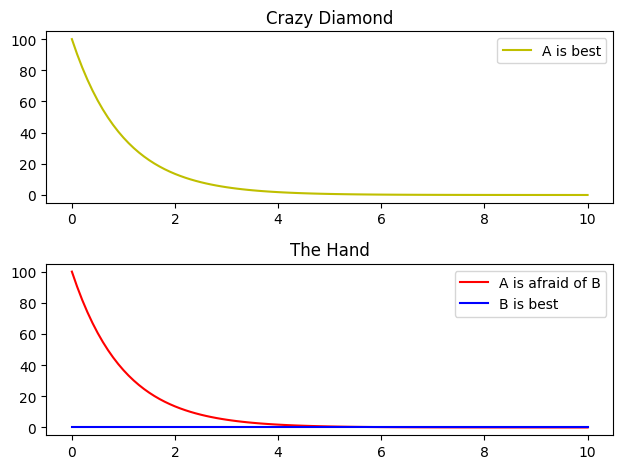

In [3]:
from mobspy import *

A, B = BaseSpecies()

A >> Zero [1]
B >> Zero [1]

A(100)
S = Simulation(A | B)
S.duration = 10
S.plot_data = False
S.run()
A_config = {'color':'y', 'label':'A is best'}
A_config_with_B =  {'color':'r', 'label':'A is afraid of B'}
B_config = {'color':'b', 'label':'B is best'}
fig_1 = {'title':'Crazy Diamond', 'species_to_plot':['A']}
fig_2 = {'title':'The Hand', 'species_to_plot':['A','B'], 'A':A_config_with_B}
config_dict = {'figures': [fig_1, fig_2], 'tight_layout':True, 'A': A_config, 'B': B_config}
S.plot_raw(config_dict)

There is also one final level reserved for individual curves. The name of this level is "plots". 